In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv('Ashrae_cleaned.csv')
df.head()

,Season,Building type,Cooling startegy_building level,Climate,Thermal sensation,Koppen climate classification,Clo,Met,Thermal preference,Relative humidity,Air velocity,Country,Air temperature
0,Summer,Office,Air Conditioned,Humid subtropical,-1.3,Cfa,0.57,1.0,Uncomfortable Cold,36.8,0.27,USA,24.3
1,Summer,Office,Air Conditioned,Humid subtropical,-1.4,Cfa,0.57,1.1,Uncomfortable Cold,33.1,0.09,USA,25.7
2,Summer,Office,Air Conditioned,Humid subtropical,0.6,Cfa,0.57,1.1,Uncomfortable Cold,34.9,0.06,USA,24.6
3,Summer,Office,Air Conditioned,Humid subtropical,0.5,Cfa,0.57,1.0,Uncomfortable Cold,31.7,0.13,USA,26.4
4,Summer,Office,Air Conditioned,Humid subtropical,1.6,Cfa,0.57,1.0,Uncomfortable Cold,33.3,0.07,USA,25.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61213 entries, 0 to 61212
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Season                           61213 non-null  object 
 1   Building type                    61213 non-null  object 
 2   Cooling startegy_building level  61213 non-null  object 
 3   Climate                          61213 non-null  object 
 4   Thermal sensation                61213 non-null  float64
 5   Koppen climate classification    61213 non-null  object 
 6   Clo                              61213 non-null  float64
 7   Met                              61213 non-null  float64
 8   Thermal preference               61213 non-null  object 
 9   Relative humidity                61213 non-null  float64
 10  Air velocity                     61213 non-null  float64
 11  Country                          61213 non-null  object 
 12  Air temperature   

In [4]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Season', 'Building type', 'Cooling startegy_building level', 'Climate',
       'Koppen climate classification', 'Thermal preference', 'Country'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [6]:
df.head()

,Season,Building type,Cooling startegy_building level,Climate,Thermal sensation,Koppen climate classification,Clo,Met,Thermal preference,Relative humidity,Air velocity,Country,Air temperature
0,2,2,0,5,-1.3,5,0.57,1.0,1,36.8,0.27,15,24.3
1,2,2,0,5,-1.4,5,0.57,1.1,1,33.1,0.09,15,25.7
2,2,2,0,5,0.6,5,0.57,1.1,1,34.9,0.06,15,24.6
3,2,2,0,5,0.5,5,0.57,1.0,1,31.7,0.13,15,26.4
4,2,2,0,5,1.6,5,0.57,1.0,1,33.3,0.07,15,25.0


In [7]:
df.to_csv('final_Ashrae.csv', index=False)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61213 entries, 0 to 61212
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Season                           61213 non-null  int32  
 1   Building type                    61213 non-null  int32  
 2   Cooling startegy_building level  61213 non-null  int32  
 3   Climate                          61213 non-null  int32  
 4   Thermal sensation                61213 non-null  float64
 5   Koppen climate classification    61213 non-null  int32  
 6   Clo                              61213 non-null  float64
 7   Met                              61213 non-null  float64
 8   Thermal preference               61213 non-null  int32  
 9   Relative humidity                61213 non-null  float64
 10  Air velocity                     61213 non-null  float64
 11  Country                          61213 non-null  int32  
 12  Air temperature   

In [9]:
for column in categorical_columns:
    print(f"Unique values in {column} after encoding:", df[column].unique())


Unique values in Season after encoding: [2 3 1 0]
Unique values in Building type after encoding: [2 3 1 0 4]
Unique values in Cooling startegy_building level after encoding: [0 2 3 1]
Unique values in Climate after encoding: [ 5 12  2  3 11  9 13 10  6  8  1  0 14  7  4]
Unique values in Koppen climate classification after encoding: [ 5  2  3  7  0  6  8  1 10 11  4  9 12]
Unique values in Thermal preference after encoding: [1 0 2]
Unique values in Country after encoding: [15  6  7 10  0  9 14  3 12 11  5  1  8  4 13  2]


## 1. Countplot for Categorical Variables:


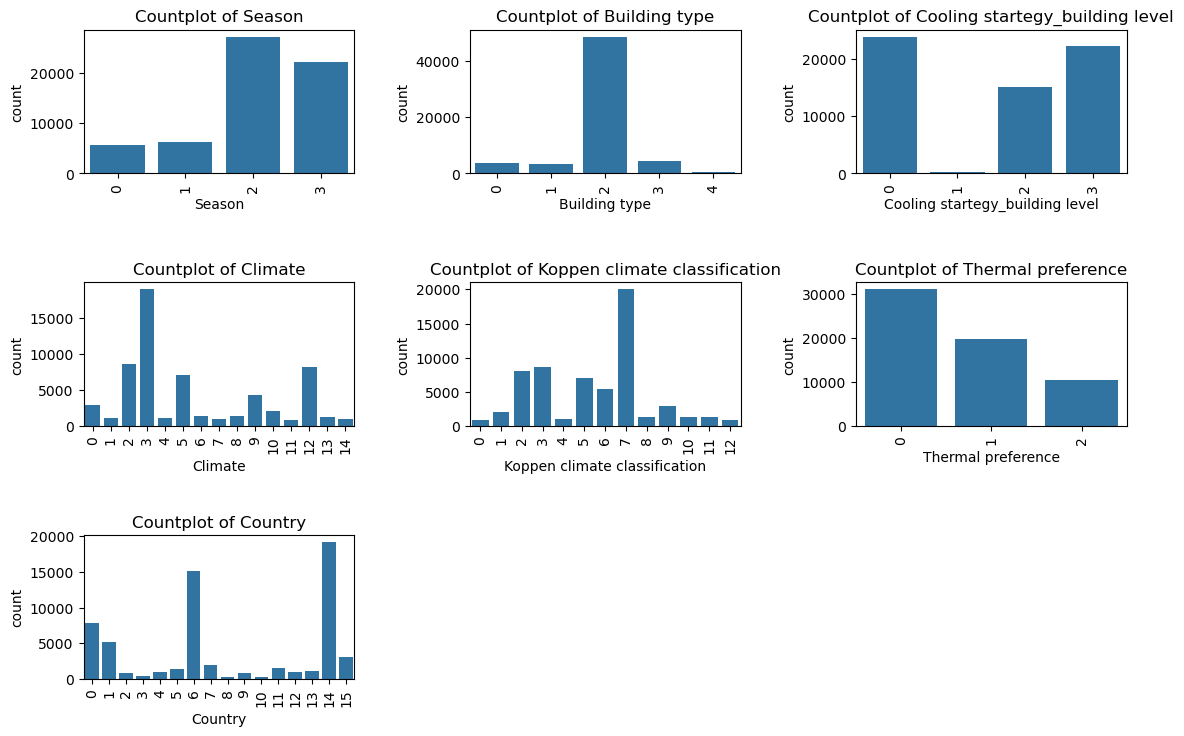

In [11]:
categorical_columns = ['Season', 'Building type', 'Cooling startegy_building level', 
                       'Climate', 'Koppen climate classification', 
                       'Thermal preference', 'Country']

plt.figure(figsize=(12, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i) 
    sns.countplot(x=df[column])
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=90)
plt.tight_layout(pad=3.0)
plt.show()


## 2. Barplot for Relationships Between Variables:


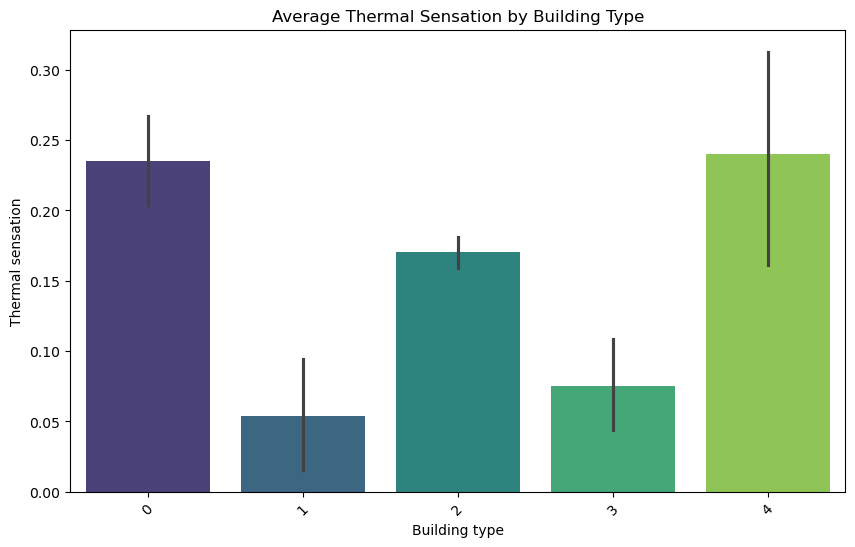

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Building type', y='Thermal sensation', data=df, palette='viridis')
plt.title('Average Thermal Sensation by Building Type')
plt.xticks(rotation=45)
plt.show()


## 3. Boxplot for Distribution:


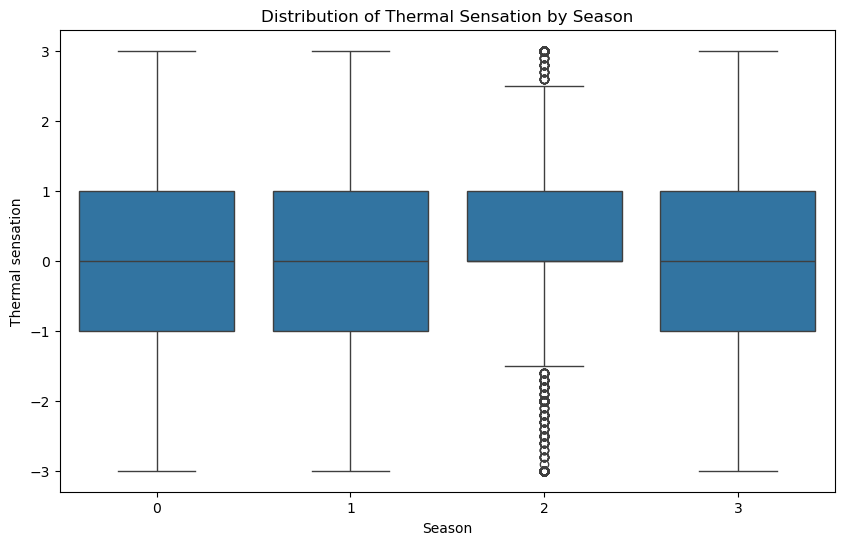

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Thermal sensation', data=df)
plt.title('Distribution of Thermal Sensation by Season')
plt.show()


## 4. Scatterplot for Bivariate Relationships:


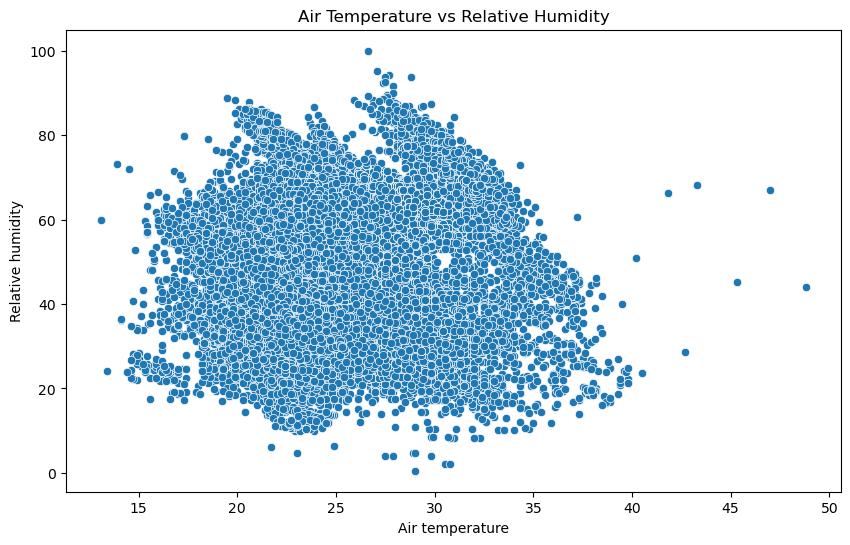

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Air temperature', y='Relative humidity', data=df)
plt.title('Air Temperature vs Relative Humidity')
plt.show()


## 5. Correlation Heatmap for Numerical Features:


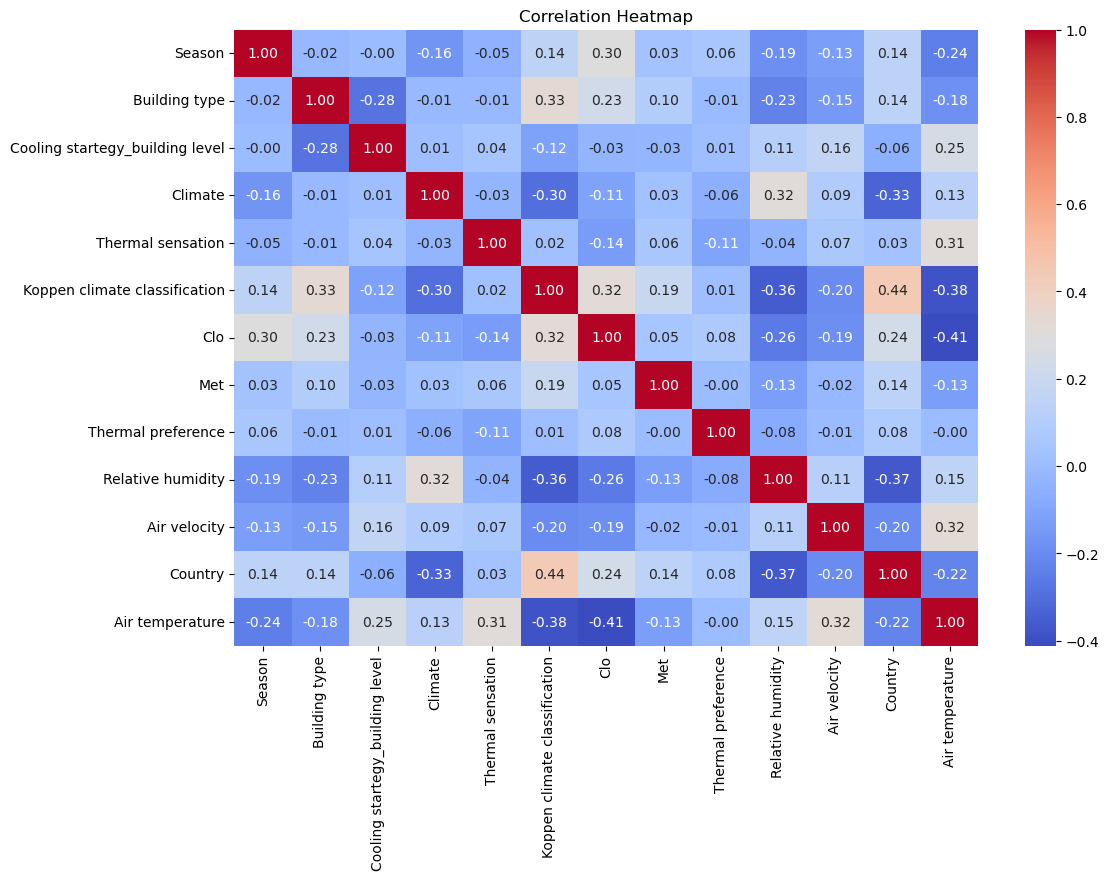

In [19]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## 6. Histogram for Distribution of Numerical Features:


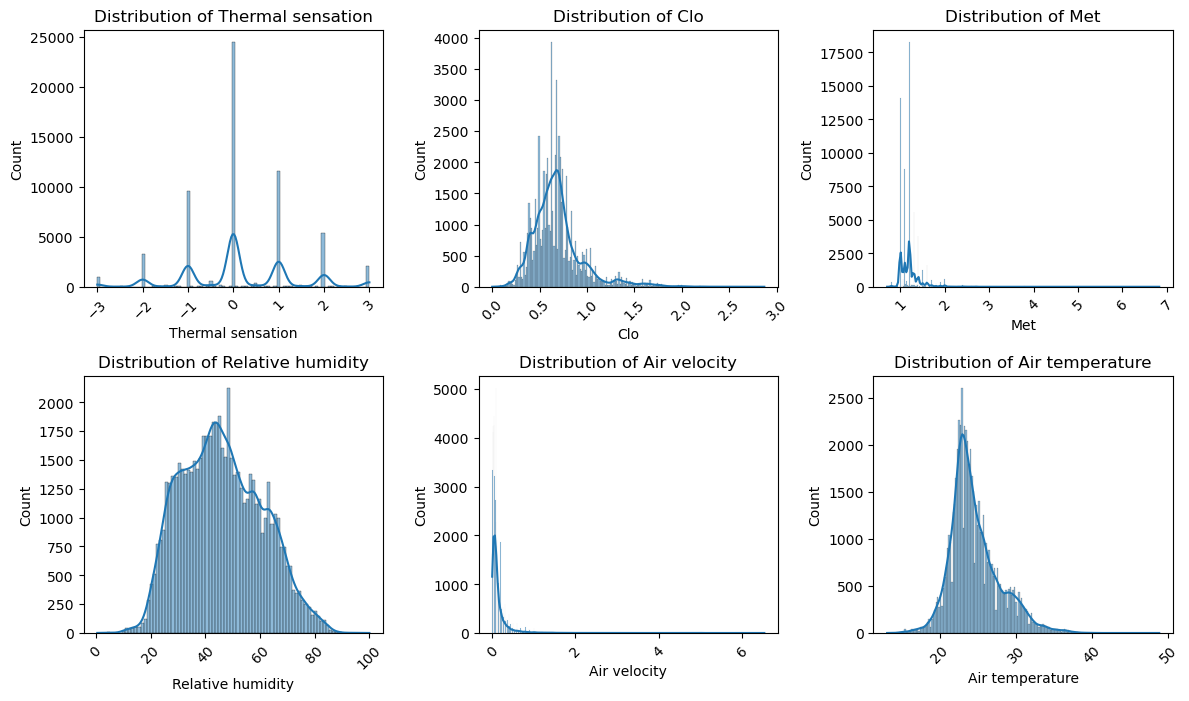

In [21]:
numerical_columns = ['Thermal sensation', 'Clo', 'Met', 'Relative humidity', 
                     'Air velocity', 'Air temperature']

plt.figure(figsize=(12, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Separate features and target
X = df.drop(columns=['Thermal preference'])
y = df['Thermal preference']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert target variable to categorical (one-hot encoding)
y = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Neural Network Model with ReLU activation
model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),  # ReLU activation
    Dropout(0.3),
    Dense(512, input_shape=(X_train.shape[1],), activation='relu'),  # ReLU activation
    Dropout(0.3),
    Dense(256, input_shape=(X_train.shape[1],), activation='relu'),  # ReLU activation
    Dropout(0.3),
    Dense(256, activation='relu'),  # ReLU activation
    Dropout(0.3),
    Dense(128, activation='relu'),  # ReLU activation
    Dropout(0.3),
    Dense(64, activation='relu'), 
    Dense(32,activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.20, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6776 - loss: 0.7684 - val_accuracy: 0.7372 - val_loss: 0.6318
Epoch 2/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7337 - loss: 0.6414 - val_accuracy: 0.7520 - val_loss: 0.6045
Epoch 3/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7417 - loss: 0.6237 - val_accuracy: 0.7534 - val_loss: 0.5952
Epoch 4/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7495 - loss: 0.6137 - val_accuracy: 0.7612 - val_loss: 0.5812
Epoch 5/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7509 - loss: 0.6059 - val_accuracy: 0.7617 - val_loss: 0.5777
Epoch 6/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7500 - loss: 0.6012 - val_accuracy: 0.7599 - val_loss: 0.5791
Epoch 7/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7502 - loss: 0.6003 - val_accuracy: 0.7578 - val_loss: 0.5765
Epoch 8/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7523 - loss: 0.5912 - 

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
import keras_tuner as kt

# Load dataset (Assuming df is already loaded)
X = df.drop(columns=['Thermal preference'])
y = df['Thermal preference']

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert target variable to categorical (one-hot encoding)
y = to_categorical(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model with regularization and dropout
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=256, max_value=512, step=128),
                    input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(rate=hp.Float('dropout_input', min_value=0.2, max_value=0.5, step=0.1)))

    for i in range(hp.Int('num_layers', 1, 4)):  # Vary number of layers
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=128, max_value=256, step=64), activation='relu',
                        kernel_regularizer=l2(0.01)))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(units=y.shape[1], activation='softmax'))

    # Compile model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Hyperparameter tuning using Keras Tuner's Hyperband
tuner = kt.Hyperband(
    build_model, 
    objective='val_accuracy', 
    max_epochs=20, 
    factor=3, 
    directory='hyperband_dir', 
    project_name='thermal_preference'
)

# Start hyperparameter search
tuner.search(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = best_model.fit(X_train, y_train, epochs=75, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Cross-validation (using scikeras KerasClassifier)
def create_keras_model():
    model = build_model(best_hps)  # Use best hyperparameters from tuner
    return model

keras_clf = KerasClassifier(model=create_keras_model, epochs=50, batch_size=32, verbose=0)

# 5-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


Reloading Tuner from hyperband_dir\thermal_preference\tuner0.json

Epoch 1/75
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7362 - loss: 0.6832 - val_accuracy: 0.7427 - val_loss: 0.6699
Epoch 2/75
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7364 - loss: 0.6773 - val_accuracy: 0.7429 - val_loss: 0.6780
Epoch 3/75
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7387 - loss: 0.6731 - val_accuracy: 0.7364 - val_loss: 0.6934
Epoch 4/75
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7386 - loss: 0.6758 - val_accuracy: 0.7373 - val_loss: 0.6769
Epoch 5/75
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7369 - loss: 0.6748 - val_accuracy: 0.7440 - val_loss: 0.6576
Epoch 6/75
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7384 - loss: 0.6717 - val_accuracy: 0.7423 - val_loss: 0.6680
Epoch 7/75
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7377 - loss: 0.6723 - val_accuracy: 0.7482 - val_loss: 0.6583
Epoch 8/75
1225/1225 ━━

In [24]:
best_model.save('ANN_tuned.h5')  # Save model as an H5 file
print("Model saved.")

Model saved.


In [25]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Function to display model summary with parameter counts
def model_summary_with_params(model):
    # Display the model architecture and parameters
    model.summary()
    
    # Visualize model architecture as an image (optional)
    plot_model(model, to_file="ANN_tuned.png", show_shapes=True, show_layer_names=True)
    print("\nModel structure saved")

# Load the trained model (assuming you have saved it as 'Enhanced_Pneumonia_Model.h5')
model = tf.keras.models.load_model("ANN_tuned.h5")

# Call the function to display the model summary
model_summary_with_params(model)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,613 (143.02 KB)

 Trainable params: 36,611 (143.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.

Model structure saved


In [26]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,835 (429.05 KB)

 Trainable params: 36,611 (143.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 73,224 (286.04 KB)

In [27]:
from sklearn.metrics import classification_report
import numpy as np

# Predict classes for the test set
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot to class labels

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))


383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      6153
           1       0.75      0.77      0.76      4046
           2       0.74      0.61      0.67      2044

    accuracy                           0.75     12243
   macro avg       0.75      0.72      0.73     12243
weighted avg       0.75      0.75      0.75     12243



In [28]:
from sklearn.metrics import classification_report
import numpy as np

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot to class labels

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))


383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      6153
           1       0.75      0.77      0.76      4046
           2       0.74      0.61      0.67      2044

    accuracy                           0.75     12243
   macro avg       0.75      0.72      0.73     12243
weighted avg       0.75      0.75      0.75     12243



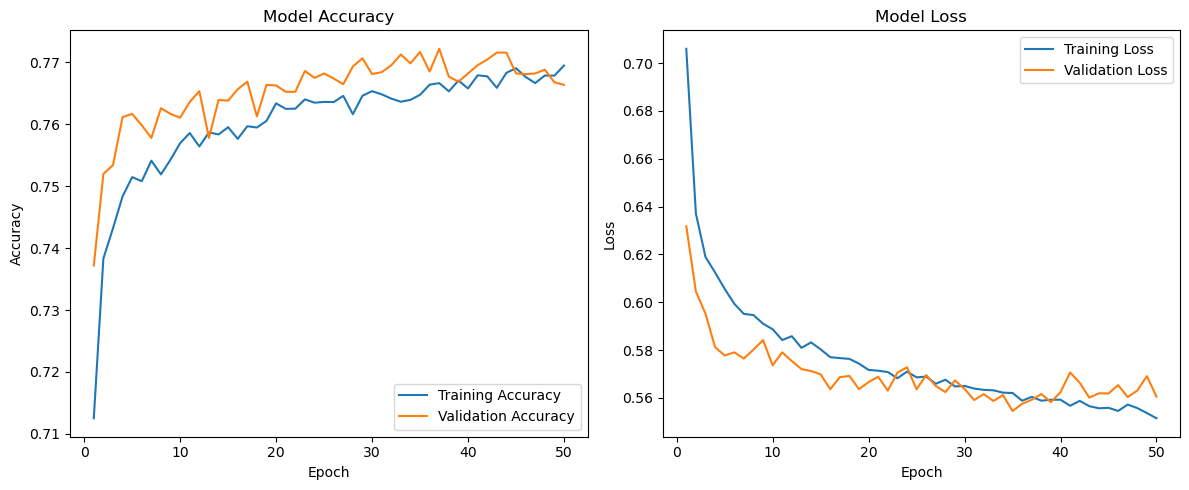

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss values
def plot_training_history(history):
    epochs = range(1, len(history.history['accuracy']) + 1)
    
    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_training_history(history)


# normal model

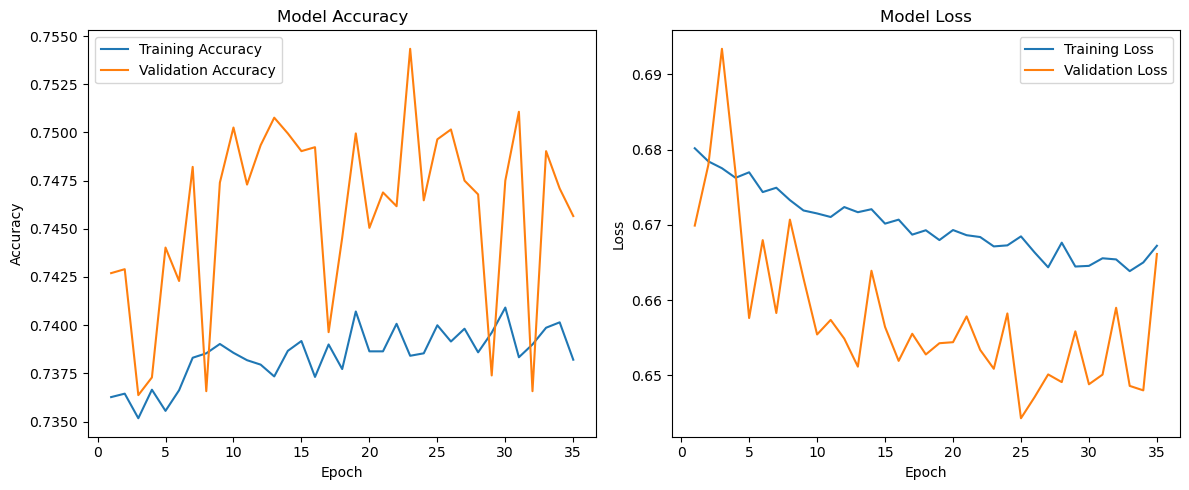

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss values
def plot_training_history(history):
    epochs = range(1, len(history.history['accuracy']) + 1)
    
    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_training_history(history)


# regularized model

383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      6153
           1       0.75      0.77      0.76      4046
           2       0.74      0.61      0.67      2044

    accuracy                           0.75     12243
   macro avg       0.75      0.72      0.73     12243
weighted avg       0.75      0.75      0.75     12243



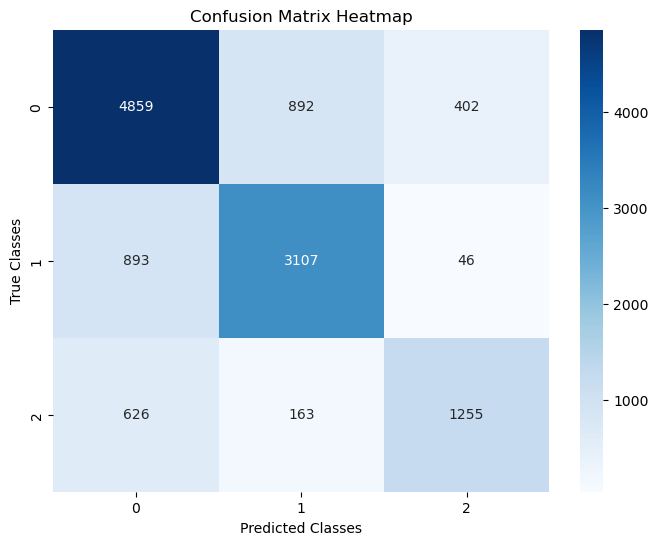

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict classes for the test set
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot to class labels

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true_classes), yticklabels=np.unique(y_true_classes))
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()


383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      6153
           1       0.77      0.79      0.78      4046
           2       0.78      0.59      0.67      2044

    accuracy                           0.77     12243
   macro avg       0.77      0.73      0.75     12243
weighted avg       0.77      0.77      0.77     12243



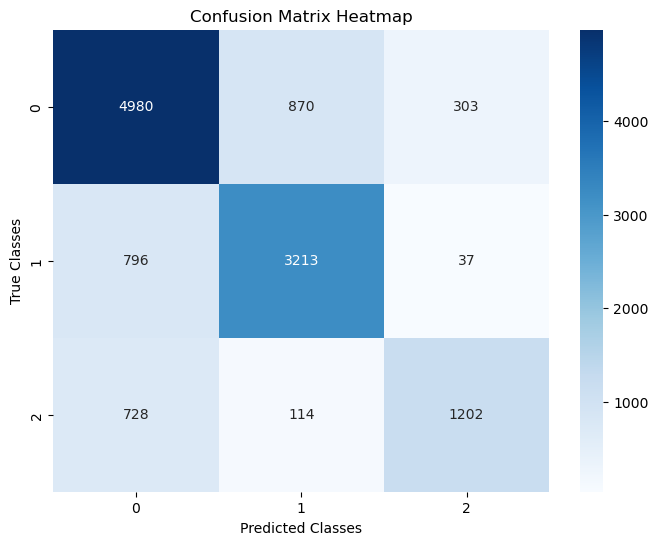

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot to class labels

# Generate the classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true_classes), yticklabels=np.unique(y_true_classes))
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()


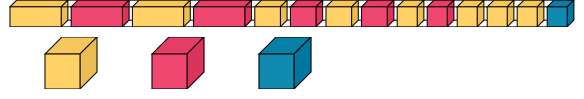

In [46]:
from PIL import ImageFont
import visualkeras
from tensorflow.keras import layers

# Load font
font = ImageFont.truetype("arial.ttf", 32)

# Add a Flatten layer to the model (or use your existing model)
model.add(layers.Flatten())

# Visualize model architecture using visualkeras
visualkeras.layered_view(model, legend=True, font=font)


In [44]:
pip install visualkeras


   ---------------------------------------- 0.0/45.1 kB ? eta -:--:--
   --------- ------------------------------ 10.2/45.1 kB ? eta -:--:--
   ---------------------------------------- 45.1/45.1 kB 561.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
